# <h1><center>Sentiment Analysis for Foody&Foodie<h1><center>

## Business Understanding

### Overview
Foody&Foodie are a family run restaurant in San francisco, CA. As a veteran in the food business they understand that they will need to keep track of sentiments from their customer base to maintain a competitive edge in the market.

### Problem Statement
The management of Foody&Foodie understand the need to find reliable feedback to guide their decision-making aiming to improve their business and match their markets ever changing needs.


### Challenges
Within the Food industry, they're several measurable parameters to that determine the success of a restaurant and we must find a neutral data set where all these aspects can be fairly evaluated for an accurate result.

### Proposed solution
We will need to create a model to analyze customer sentiments through reviews on restaurants within the target area using a single popular review site, Yelp, to pull the relevant data as it is the most comprehensive compilation of reviews in the target market.



### Objectives
#### Main Objective
- To create a model that could successfully predict the sentiment of a customer’s review. The model would attain a recall score and accuracy score above 80%

#### Specific Objective
- To identify the most common words used in the dataset using a Word cloud.
- To confirm the most common words that are positively and negatively tagged.
- To recognize the products that have been opined by the customers.
- To spot the distribution of the sentiments.















## Data Understanding
Our dataset is a compilation of writen reviews, ratings, review IDs, review date and business IDs from the Yelp website. The compilation of this data allows us to clearly identfy positive and negatve sentiments in relation to a rating given on a scale of 1-5 as well as reactions to the sentiment by readers categorized as cool, useful or funny.
Post cleaning the data, these are the metrics we will use to isolate and model a collective non biased scale of opinions on restarunts in the area.



In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\PROBOOK
[nltk_data]     6460\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load restaurant data - This also works
original_df = pd.read_csv("data.zip", nrows=100000) # The data is too large, we should use a sample of it

# Save the new copy
original_df.to_csv("test_restaurants.csv")

# Open the lean dataset
df = pd.read_csv("test_restaurants.csv", index_col=0)

In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
3,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
4,u0smrr16uVQ8pgSEseXcKg,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5,0,0,0,So day 2 in Nashville. I gotta get some BBQ. M...,2021-03-17 20:09:00


In [5]:
# Drop irrelevant columns
df = df.drop(columns=['review_id', 'user_id', 'business_id'])


In [ ]:
df.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'date'], dtype='object')

In [ ]:
df.describe()


,Unnamed: 0,stars,useful,funny,cool
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,3.836320,0.802660,0.207630,0.480770
std,28867.657797,1.504803,2.779722,1.236105,2.434105
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24999.750000,3.000000,0.000000,0.000000,0.000000
50%,49999.500000,5.000000,0.000000,0.000000,0.000000
75%,74999.250000,5.000000,1.000000,0.000000,0.000000
max,99999.000000,5.000000,179.000000,100.000000,164.000000


In [6]:
# Define a function to categorize reviews
def categorize_review(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new column
df['review_category'] = df['stars'].apply(categorize_review)

# Display the DataFrame with the new column
df.head(2)


,stars,useful,funny,cool,text,date,review_category
0,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,positive
1,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,negative


In [7]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)


In [8]:
# Check for missing values
df.isnull().sum()

df.dropna(inplace=True)

In [9]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()

In [10]:
# Remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [11]:
# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [12]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')
nltk.download('punkt')  # You might also need this for word tokenization

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Initialize the WordNet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


## Exploratory Data Analysis (EDA) ##

In [14]:
#Handling missing values

 # Convert non-string values to strings, filling NaNs with an empty string
df['text'] = df['text'].fillna('').astype(str)

# Calculate the length of each text entry
df['text_Length'] = df['text'].apply(len)

# Display summary statistics of the text lengths
print(df['text_Length'].describe())

count    100000.000000
mean        292.206010
std         264.402132
min          20.000000
25%         123.000000
50%         210.000000
75%         367.000000
max        3523.000000
Name: text_Length, dtype: float64


In [ ]:
# Check for basic information about the data
df.info()

# Summary statistics of the text lengths
df['text_Length'] = df['text'].apply(len)
df['text_Length'].describe()

# Check for the distribution of sentiment labels (if available)
if 'Sentiment' in df.columns:
    print(df['Sentiment'].value_counts())
    sns.countplot(x='Sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   stars            100000 non-null  int64 
 1   useful           100000 non-null  int64 
 2   funny            100000 non-null  int64 
 3   cool             100000 non-null  int64 
 4   text             100000 non-null  object
 5   date             100000 non-null  object
 6   review_category  100000 non-null  object
 7   text_Length      100000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 8.9+ MB


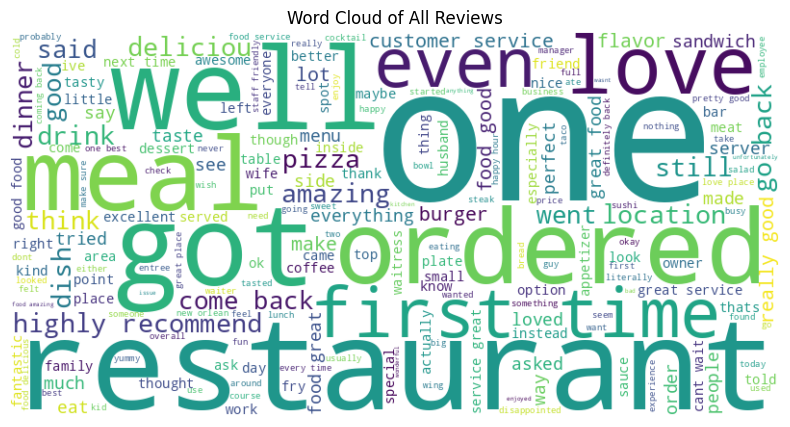

In [ ]:
# Generate a word cloud for the entire dataset
from wordcloud import WordCloud

all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

# Generate separate word clouds for positive and negative sentiments if labeled
if 'Sentiment' in df.columns:
    positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
    negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])

    # Positive reviews word cloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Positive Reviews')
    plt.show()

    # Negative reviews word cloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Negative Reviews')
    plt.show()


### Distribution of Review Lengths

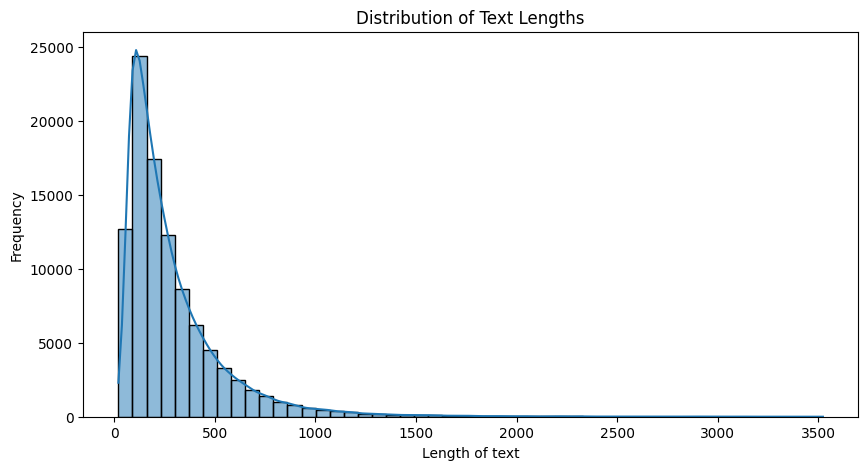

In [ ]:
# Plot the distribution of review lengths
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

The majority of short reviews suggest users prefer brief comments, suggesting businesses should focus on concise messaging. The content may include quick impressions or detailed experiences, offering insights into customer satisfaction. Data analysis should consider skewness and median word count.

#### Distribution of Star Ratings

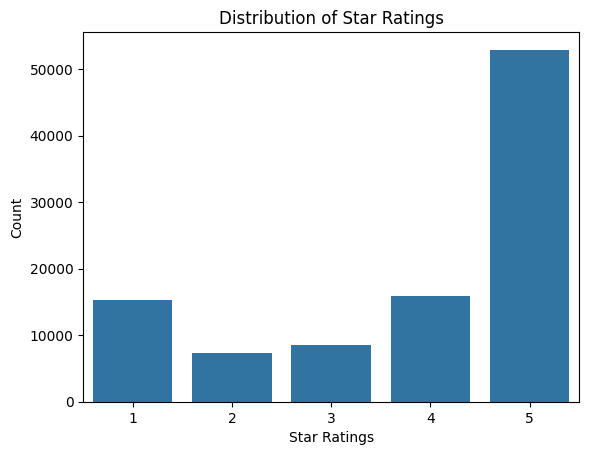

In [ ]:
# Bar plot for the distribution of star ratings
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


The high number of 5-star reviews on Yelp may make it challenging to distinguish outstanding businesses from average ones due to the skewed nature of ratings. Additionally, Yelp reviewers may be more motivated to leave a review after a positive experience.

#### Distribution of "Cool", "Useful", and "Funny" Votes

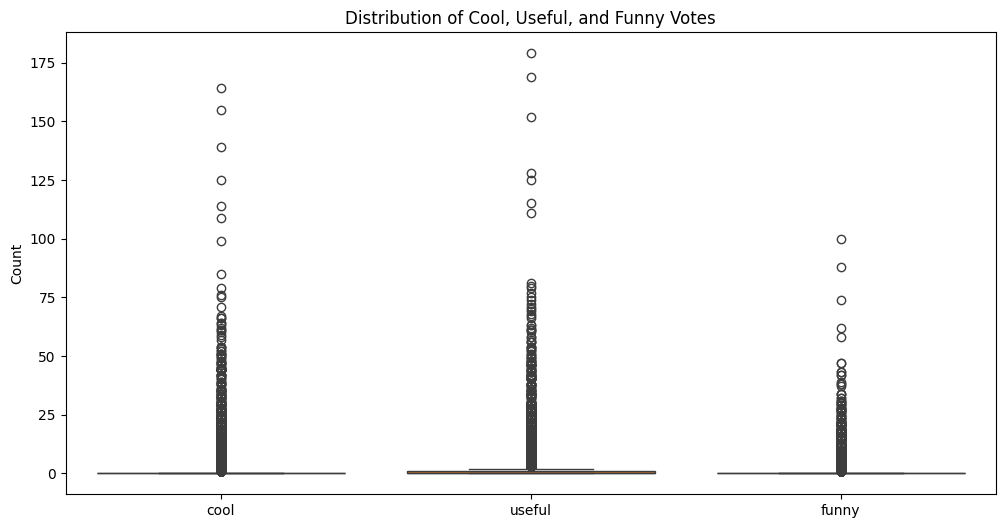

In [ ]:
# Boxplot for cool, useful, and funny votes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['cool', 'useful', 'funny']])
plt.title('Distribution of Cool, Useful, and Funny Votes')
plt.ylabel('Count')
plt.show()

The presence of numerous outliers in all three plots indicates that while most reviews receive a standard level of engagement, some stand out and generate significantly more reactions. This could be due to the content, business popularity, or timing of the review. The variation in IQRs and outliers suggests that some reviews resonate more strongly with the Yelp community, leading to higher interaction levels. Some reviews, particularly in the middle plot, have the potential to go viral on the Yelp platform.

 ### Top Most Frequent Words

Lets dentify the most frequent words that can help understand common themes in the dataset.

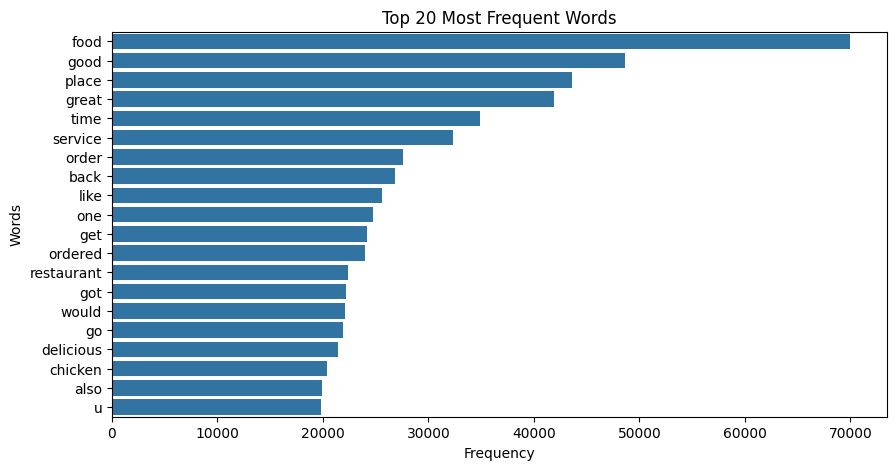

In [ ]:
from collections import Counter

# Tokenize the reviews and remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Flatten the list of tokens
all_words = [word for tokens in df['Tokens'] for word in tokens]

# Get the frequency distribution of words
word_freq = Counter(all_words)

# Plot the top N most frequent words
top_n = 20
common_words = word_freq.most_common(top_n)
words, counts = zip(*common_words)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Word': words, 'Frequency': counts})

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=df_plot)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

The majority of reviews express positive sentiments, indicating customer satisfaction at restaurants. Key positive keywords focus on food quality and customer service, indicating their importance. Negative sentiments suggest areas for improvement, such as specific menu items or service speed. The diverse reviews highlight the importance of consistency in quality and service, highlighting the varied experiences of customers.

### Correlation Analysis

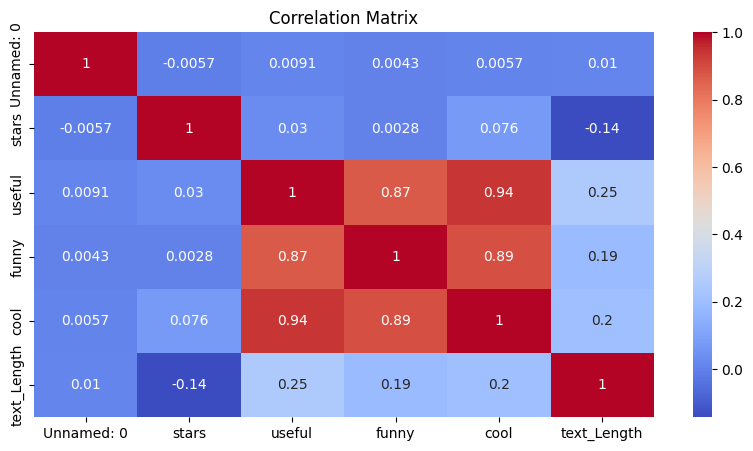

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if numeric_df.shape[1] > 0:
    plt.figure(figsize=(10, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns to plot.")



# MODELLING

## Data Preprocessing

The data preprocessing steps taken for this project included:

1. Splitting the data between the target and features
2. Label Encoding the target
3. Vectorising the data using TFIDF Vectoriser
4. Using SMOTE to avoid bias in the data
5. Split the data using Train-Test Split of 80-20

Additionally the models in the modelling section include:
1. Logistic Regression
2. Random Forest Classifier
3. Linear Support Vector Machine
4. Multinomial Bayes
5. Decision Trees Classifier

In [2]:
# Section Imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [15]:
# The X and Target
X = df['text']
y = df['review_category']

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_classes = le.classes_
print(target_classes)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(df["text"])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(vectorizer.vocabulary_)
X_vec.set_index(y.index, inplace=True)

# SMOTE
sm = SMOTE(random_state=42)
X_tf_smote, y_tf_smote = sm.fit_resample(X_vec, y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tf_smote, y_tf_smote, test_size=0.2, random_state=42)

['negative' 'neutral' 'positive']


***Helper Functions***

In [16]:
def modelling(model, name):
  """This func models the data """
  # Build and train the model
  model.fit(X_train, y_train)

  # Predict and evaluate
  y_pred = model.predict(X_test)
  print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

In [17]:
def hyper_tuning(model, params, name):
  """This func hyper-parameter tunes each model according to specified parameters."""
  # Perform Grid Search
  grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring="accuracy")
  grid_search.fit(X_train, y_train)

  # Best parameters and score
  print(f"\nBest parameters: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_}\n")

  # Evaluate the best model on test data
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  print(f"{name} Best Model Classification Report:\n", classification_report(y_test, y_pred))

### Logistic Regression

In [ ]:
# Build and train the model
lr_model = LogisticRegression(max_iter=3000)

# Modelling
modelling(lr_model, name="Logistic Regression")


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     13557
           1       0.82      0.86      0.84     13954
           2       0.93      0.89      0.91     13755

    accuracy                           0.87     41266
   macro avg       0.88      0.87      0.88     41266
weighted avg       0.88      0.87      0.87     41266



#### ***Hyper-parameter Tuning***

In [ ]:
# The parameters
c_space = np.linspace(30, 32, 3)
max_iters = [2000, 3000]
solvers = ["lbfgs", "liblinear"]
lr_param_grid = { 'C': c_space, 'max_iter':max_iters }

hyper_tuning(model=lr_model, params=lr_param_grid, name="Linear Regression")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................C=30.0, max_iter=2000; total time= 4.2min
[CV] END ..............................C=30.0, max_iter=2000; total time= 4.2min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.7min
[CV] END ..............................C=30.0, max_iter=3000; total time= 4.3min
[CV] END ..............................C=30.0, max_iter=3000; total time= 4.4min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.7min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.7min
[CV] END ..............................C=31.0, max_iter=2000; total time= 3.5min
[CV] END ..............................C=31.0, ma

##### ***Observation***
> The Logistic Regression had a high accuracy value of 87% meeting our model expectations. The Macro Avg value of Recall was also 87%.

> Tuning the Logistic Regression model improved the scores - The Accuracy Score and the Macro Average Recall Score  improved slightly to 89%.

### Random Forest Model

In [ ]:
# Build and train the model with reduced parameters
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10,
    min_samples_leaf=5, random_state=42
)

# Modelling
modelling(rf_model, name="Random Forest Classifier")


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77     13557
           1       0.77      0.72      0.75     13954
           2       0.77      0.86      0.81     13755

    accuracy                           0.78     41266
   macro avg       0.78      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [18]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10,
    min_samples_leaf=5, random_state=42
)

rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20]   # Maximum depth of the tree
}

hyper_tuning(model=rf_model, params=rf_param_grid, name="Random Forest Classifier")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.8min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.9min
[CV] END ...................max_depth=None, n_estimators=200; total time=10.8min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.1min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.0min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.1min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.4min
[CV] END .....................max_depth=10, n_estimators=100; total time=  51.2s
[CV] END .....................max_depth=10, n_est

##### ***Observation***
> The Random Forest Model had a low accuracy score of 78% and a Macro Avg Recall Score of 78%.

> Upon hyperparameter tuning, the model scores went up significantly with both the Accuracy score and the Macro Avg Recall score hitting 90%

#### Linear Support Vector Machine (SVM)

In [ ]:
# Reduce dimensionality with TruncatedSVD (like PCA for sparse data)
svd = TruncatedSVD(n_components=100)  # Adjust n_components for speed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Define the model
svm_model = LinearSVC()

# Train the model on reduced data
svm_model.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test_reduced)
print("SVM Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     13557
           1       0.75      0.69      0.72     13954
           2       0.85      0.84      0.84     13755

    accuracy                           0.79     41266
   macro avg       0.79      0.79      0.79     41266
weighted avg       0.79      0.79      0.79     41266



#### ***Hyper-parameter Tuning***

In [ ]:
# Pipeline for LinearSVC with TruncatedSVD
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svd', TruncatedSVD()),  # Dimensionality reduction
    ('svm', LinearSVC())  # Linear SVM
])

# Define hyperparameters for Grid Search
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or Bigrams
    'svd__n_components': [100, 200],  # Number of components for TruncatedSVD
    'svm__C': [0.1, 1]  # Regularization parameter for LinearSVC
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best parameters: {'svd__n_components': 200, 'svm__C': 1, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.8713497922776694
Classification Report for the Best Model:
               precision    recall  f1-score   support

    negative       0.79      0.87      0.83     19965
     neutral       0.56      0.07      0.13      7217
    positive       0.91      0.97      0.94     58773

    accuracy                           0.87     85955
   macro avg       0.75      0.64      0.63     85955
weighted avg       0.85      0.87      0.84     85955



##### ***Observation***
> The Support Vector Machine had a low accuracy value and a Macro Avg Recall Value of 79%.

> After Hyperparameter Tuning, the accuracy improved to 87% but the Macro Avg Recall Score decreased significantly to 64%.

### Multinomial Bayes Model (MNB)

In [ ]:
# Instantiate the MNB model
mnb = MultinomialNB()

# Modelling
modelling(mnb, name="Multinomial Bayes")

Multinomial Bayes Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76     13557
           1       0.69      0.73      0.71     13954
           2       0.90      0.84      0.87     13755

    accuracy                           0.78     41266
   macro avg       0.79      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [19]:
mnb = MultinomialNB()

# Parameters
mnb_param_grid = {
    'alpha': [0.01, 0.1]
}

hyper_tuning(model=mnb, name="MultiNomial Bayes", params=mnb_param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................alpha=0.01; total time=  27.6s
[CV] END .........................................alpha=0.01; total time=  28.1s
[CV] END .........................................alpha=0.01; total time=  27.0s
[CV] END .........................................alpha=0.01; total time=  27.4s
[CV] END .........................................alpha=0.01; total time=  27.4s
[CV] END ..........................................alpha=0.1; total time=  27.5s
[CV] END ..........................................alpha=0.1; total time=  27.9s
[CV] END ..........................................alpha=0.1; total time=  28.1s
[CV] END ..........................................alpha=0.1; total time=  27.7s
[CV] END ..........................................alpha=0.1; total time=  27.6s
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.7813003455757997
MultiNomial Bayes Best Model Classification Repor

##### ***Observation***
The Multinomial Bayes Model had a low accuracy value and a Macro Avg Recall Value of 78%.

Applying hyperparameter tuning to the MultiNomial Bayes Model did not lead to any significant changes in the models' scores.

### Decision Trees

In [ ]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

# Modelling
modelling(dt, name="Decision Trees")

Decision Trees Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79     13557
           1       0.80      0.81      0.80     13954
           2       0.79      0.73      0.76     13755

    accuracy                           0.78     41266
   macro avg       0.78      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [21]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

# Parameters
dt_param_grid = {"min_samples_split":[4, 5]}

hyper_tuning(model=dt, name="Decision Trees", params=dt_param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ................................min_samples_split=4; total time=  31.8s
[CV] END ................................min_samples_split=4; total time=  31.1s
[CV] END ................................min_samples_split=4; total time=  30.5s
[CV] END ................................min_samples_split=4; total time=  31.0s
[CV] END ................................min_samples_split=4; total time=  30.6s
[CV] END ................................min_samples_split=5; total time=  30.4s
[CV] END ................................min_samples_split=5; total time=  30.9s
[CV] END ................................min_samples_split=5; total time=  31.1s
[CV] END ................................min_samples_split=5; total time=  30.3s
[CV] END ................................min_samples_split=5; total time=  30.4s
Best parameters: {'min_samples_split': 4}
Best cross-validation score: 0.7414365393855894
Decision Trees Best Model Classification

##### ***Observation***
> The Decision Tree Classifier had a low accuracy value and a Macro Avg Recall Value of 78%.

> The Decision Tree performance did not increase after the hyperparamter tuning.

## Evaluation

In [22]:
# Model Names
models = ['LogisticRegression', 'Tuned LogisticRegression',
          'Random Forest', 'Tuned Random Forest',
          'Linear SVM', 'Tuned Linear SVM',
          'Multinomial Bayes', 'Tuned MultinomialNB',
          'Decision Tree', 'Tuned Decision Tree']

# Scores
model_accuracy_scores = [0.87, 0.89, 0.78, 0.90, 0.79, 0.87, 0.78, 0.78, 0.78, 0.77]
model_recall_scores =   [0.87, 0.89, 0.78, 0.90, 0.79, 0.64, 0.78, 0.78, 0.78, 0.77]

# Creating a dictionary with model names as keys and metric scores as values
data = {
    "models": models,
    "accuracy": model_accuracy_scores,
    "recall": model_recall_scores
}

# Creating the DataFrame
evaluation_df = pd.DataFrame(data=data)

# Sort Order
evaluation_df.sort_values(by='accuracy', ascending=True, inplace=True)

# Displaying the DataFrame
print("Resuts with TF-IDF")
print(evaluation_df)

Resuts with TF-IDF
                     models  accuracy  recall
9       Tuned Decision Tree      0.77    0.77
2             Random Forest      0.78    0.78
6         Multinomial Bayes      0.78    0.78
7       Tuned MultinomialNB      0.78    0.78
8             Decision Tree      0.78    0.78
4                Linear SVM      0.79    0.79
0        LogisticRegression      0.87    0.87
5          Tuned Linear SVM      0.87    0.64
1  Tuned LogisticRegression      0.89    0.89
3       Tuned Random Forest      0.90    0.90


<BarContainer object of 10 artists>

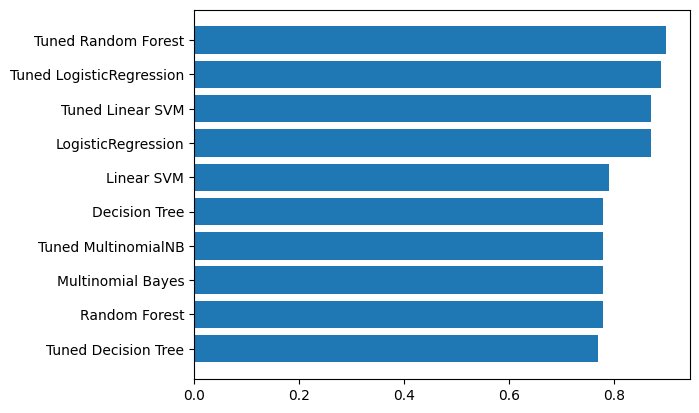

In [23]:
# Obseravtion of the Models Ran
fig = plt.figure(figsize=(10, 8))
plt.barh(y=evaluation_df['models'], width=evaluation_df['accuracy'])
plt.title("Accuracy Scores of the Models Used")

##### Observation
The tuned Random Forest offered both the highest accuracy score as well as the highest recall. We will use the model in our deployment.

## Deployment
To deploy effectively, we need our models and vectoriser in pickle files.

In [1]:
import pickle